## Final Project:Telecom customer churn

### I. Introduction
Nowadays, companies are increasingly aware of the importance of subscription services, and the churn rate is a critical indicator to track the health of a subscription-based company. To be more precise, the company can take measures in advance by predicting the customer churn rate to retain customers consistently. Therefore, this project goal is to make a churn prediction so that Telco can optimize products and services proactively.

###  importing libraries

In [1]:
import pandas as pd # Pandas for data manipulation of the dataframe.
import numpy as np # Numerical pyhton to do numerical calculation.

# To do a visualisation of the different plots.
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

## Webscapping

In [2]:
# In this step we start webscapping for fetching data of varius city name of Iran because the customer telecom data is confidential I cant find any Free Api for getting telecome data

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_cities_in_Iran_by_province#Tehran_Province"

# # Send a GET request to the URL
response = requests.get(url)

# # Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# #mw-content-text > div.mw-parser-output > table:nth-child(64) > tbody > tr:nth-child(1) > td:nth-child(2)

# # Find the table containing the cities in Tehran province
table = soup.find("table", {"class": "wikitable sortable"})

# # # Find the rows in the table
# # rows = table.find_all("tr")

# # # Initialize the city_name variable to None
# # city_name = None

# # # Find the row containing Tehran city and extract the city name
# # for row in rows:
# #     cells = row.find_all("td")
# #     if len(cells) > 0 and cells[0].get_text().strip() == "Tehran":
# #         city_name = cells[1].get_text().strip()
# #         break

# # if city_name:
# #     print("City name of Tehran:", city_name)
# # else:
# #     print("City name of Tehran not found.")


In [4]:
#soup

In [5]:
soup.select("td:nth-child(2)")[4].get_text()

'Mohammadshahr\n'

In [6]:
#initialize empty lists
city = []



# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("td:nth-child(2)"))

tClist = soup.select("td:nth-child(2)")
#spanlist = soup.select("td.titleColumn span.secondaryInfo")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    city.append(tClist[i].get_text())
#     dir_stars.append(tClist[i]["city"])
#     year.append(spanlist[i].get_text())

print(city)
# print(dir_stars)
# print(year)


['Karaj\n', 'Fardis\n', 'Kamal Shahr\n', 'Nazarabad\n', 'Mohammadshahr\n', 'Hashtgerd\n', 'Mahdasht\n', 'Meshkin Dasht\n', 'Chaharbagh\n', 'Shahr-e Jadid-e Hashtgerd\n', 'Eshtehard\n', 'Garmdarreh\n', 'Golsar\n', 'Kuhsar\n', 'Taleqan\n', 'Asara\n', 'Tankaman\n', 'Ardabil\n', 'Parsabad\n', 'Meshginshahr\n', 'Khalkhal\n', 'Germi\n', 'Bileh Savar\n', 'Namin\n', 'Jafarabad\n', 'Kivi\n', 'Anbaran\n', 'Abi Beyglu\n', 'Nir\n', 'Hashatjin\n', 'Sareyn\n', 'Aslan Duz\n', 'Eslamabad-e Qadim\n', 'Tazeh Kand-e Qadim\n', 'Qosabeh\n', 'Lahrud\n', 'Hir\n', 'Kolowr\n', 'Razey\n', 'Tazeh Kand-e Angut\n', 'Fakhrabad\n', 'Kuraim\n', 'Moradlu\n', 'Bushehr\n', 'Borazjan\n', 'Bandar Ganaveh\n', 'Khormoj\n', 'Bandar Kangan\n', 'Jam\n', 'Bandar Deylam\n', 'Bandar-e Deyr\n', 'Ali Shahr\n', 'Choghadak\n', 'Ab Pakhsh\n', 'Ahram\n', 'Vahdatiyeh\n', 'Kaki\n', 'Bank\n', 'Nakhl Taqi\n', 'Asaluyeh\n', 'Kharg\n', 'Dalaki\n', 'Sadabad\n', 'Shabankareh\n', 'Abdan\n', 'Bandar Rig\n', 'Bardestan\n', 'Bord Khun\n', 'Delvar\

In [7]:
# each list becomes a column
city_name = pd.DataFrame({"city":city})

In [8]:
city_name

,city
0,Karaj\n
1,Fardis\n
2,Kamal Shahr\n
3,Nazarabad\n
4,Mohammadshahr\n
...,...
1251,Halab\n
1252,Nik Pey\n
1253,\nAfghanistan\nArmenia\nAzerbaijan\nBahrain\nB...
1254,\nAbkhazia\nArtsakh\nNorthern Cyprus\nPalestin...


In [9]:
#checking data 
city_name.value_counts()

city         
Sardasht\n       4
Rezvanshahr\n    3
Hasanabad\n      3
Hajjiabad\n      3
Salehabad\n      3
                ..
Golgir\n         1
Golestan\n       1
Goldasht\n       1
Golbaf\n         1
Zurabad\n        1
Length: 1224, dtype: int64

In [10]:
# Remove the newline characters from the city names
city_name['city'] = city_name['city'].str.replace('\n', '')
    


In [11]:
city_name.value_counts()

city       
Sardasht       4
Rezvanshahr    3
Hasanabad      3
Hajjiabad      3
Salehabad      3
              ..
Golgir         1
Golestan       1
Goldasht       1
Golbaf         1
Zurabad        1
Length: 1224, dtype: int64

In [12]:
city_name.tail(100)

,city
1156,Ferunabad
1157,Lavasan
1158,Firuzkuh
1159,Ahmadabad-e Mostowfi
1160,Absard
...,...
1251,Halab
1252,Nik Pey
1253,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...
1254,AbkhaziaArtsakhNorthern CyprusPalestineSouth O...


In [13]:
# Drop rows 1253 to 1255 (inclusive)
city_name =city_name.drop(city_name.index[1253:1256])

In [14]:
city_name

,city
0,Karaj
1,Fardis
2,Kamal Shahr
3,Nazarabad
4,Mohammadshahr
...,...
1248,Zarrinabad
1249,Armaghankhaneh
1250,Chavarzaq
1251,Halab


In [15]:
# loading dataset from local directory.
df = pd.read_csv('churn_telo.csv')

In [16]:
#our dataset has 7043 rows and 21 columns
df.shape

(7043, 21)

In [17]:
 # Reading a dataset using head function.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
 # Reading a tail of dataset using head function.
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## II. Data Description

The raw data contains 7043 rows (customers) and 21 columns (features).

- customer ID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## III.Data Collection

In [19]:
# This info function is just gives the information about data types of the variables in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Dataset has 7,043 samples and 21 attributes(2 integer, 1 float, and 18 objects)
- Target Feature: Churn
- Numeric Features: Tenure, MonthlyCharges, and TotalCharges
- Categorical Features: CustomerID, Gender, SeniorCitizen, Partner, Dependents, PhoneService, MulitpleLines, InternetService,  OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling,
 PaymentMethod

## |||| Data Reshaping & Cleaning


- Rename the features 'tenure' and 'gender'
- Convert the feature 'TotalCharges' to numerical data type
- Converting the feature 'SeniorCitizen' to object data type

In [20]:
 #renaming 'tenure' and 'gender'
df = df.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

# converting 'TotalCharges' to numerical data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')

# converting 'SeniorCitizen' to object data type
df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1872/3223722138.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)


In [21]:
#checking Null values
df.isna().sum()

customerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Above result showes that we 11 numbers null values in thr total charge

In [22]:
#checking more detail in nuul values
df.isna().sum().sum()

11

In [23]:
df['TotalCharges'].value_counts()

20.200001      11
19.750000       9
20.049999       8
19.900000       8
19.650000       8
               ..
6849.399902     1
692.349976      1
130.149994      1
3211.899902     1
6844.500000     1
Name: TotalCharges, Length: 6530, dtype: int64

In [24]:
#percentage of null values
percentage_of_null_values = df['TotalCharges'].isna().sum() / len(df['TotalCharges']) * 100
print("Percentage of null values in TotalCharges column:", percentage_of_null_values)


Percentage of null values in TotalCharges column: 0.1561834445548772


#### Above result showes that we have less percentage of null values so we can fill with "0"

In [25]:
#filling null values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)



In [26]:
#checking null values
df['TotalCharges'].isna().sum()

0

In [27]:
df.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
# checking data set values
df['Gender'].value_counts()

Male      3551
Female    3485
female       3
male         2
MMale        1
"Male"       1
Name: Gender, dtype: int64

#### Above code showes that we have messy data in gender so we should clean that

In [30]:
df['Gender'] = df['Gender'].replace(['female', 'F', 'f'], 'Female')
df['Gender'] = df['Gender'].replace(['"Male"', 'MMale','M', 'm','male'], 'Male')


In [31]:
# No .of customers according to Gender the majority of customers are "Male"
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [32]:
## No .of customers with seniorcitizen
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [33]:
# No .of customers are planning to change the service provider
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [34]:
# No .of customers have partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [35]:
## No .of customer use streaming service
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [36]:
# No .of customer according to type of contract
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [37]:
#dividing categorical and numerical
categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(include=np.number)

In [38]:
#showing numerical
numerical

,Tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.850000
1,34,56.95,1889.500000
2,2,53.85,108.150002
3,45,42.30,1840.750000
4,2,70.70,151.649994
...,...,...,...
7038,24,84.80,1990.500000
7039,72,103.20,7362.899902
7040,11,29.60,346.450012
7041,4,74.40,306.600006


## V. Exploratory Data Analysis(EDA)

### 1. Target Variable
(1) Churn: Customer churn rate of Telco from this dataset is 27%

Text(0.5, 1.0, 'Churn vs Non Churn')

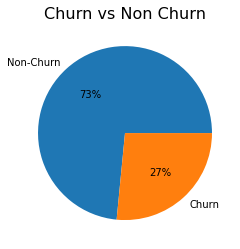

In [39]:
#Pie chart of churn
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Churn vs Non Churn', fontsize=16)

In [40]:
#same data for plotting bar chart

26.536987079369588


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar plot for churn')

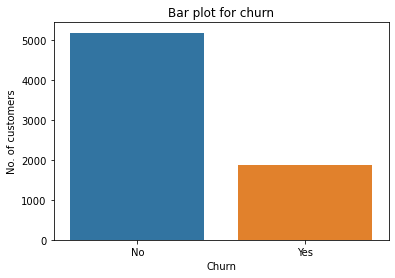

In [41]:
# Bar plot of churn variable
sns.countplot(df['Churn'])
print(len(df[df['Churn']=='Yes'])/len(df)*100)
plt.xlabel('Churn') # Giving x label to the bar plot
plt.ylabel('No. of customers') # Giving y label to the bar plot
plt.title('Bar plot for churn') # Giving title to the bar plot

## 2. Numeric Features
(1) Tenure: Customer with less tenure is more likely to churn.

(2) Monthly Charges: Customer with low monthly charges is less likely to churn; however, the churn trend between churn customers and non-churn customers gets similar as monthly charges go up.

(3) Total Charges: The distribution is similar for both churn customers and non-churn customers, implying that the feature Total Charges may not be a good predictor.

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

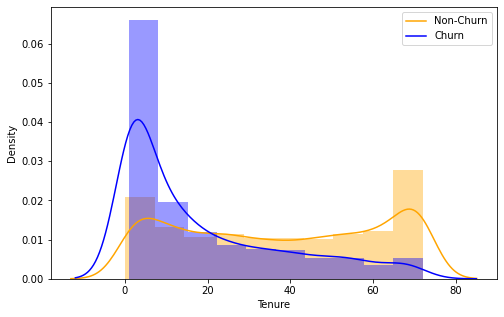

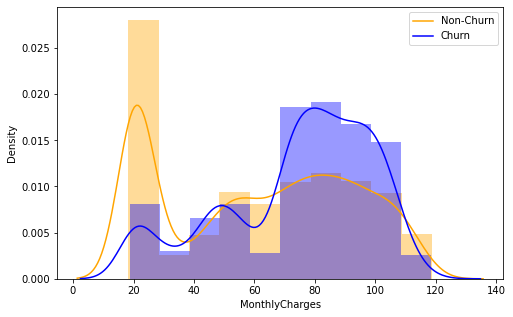

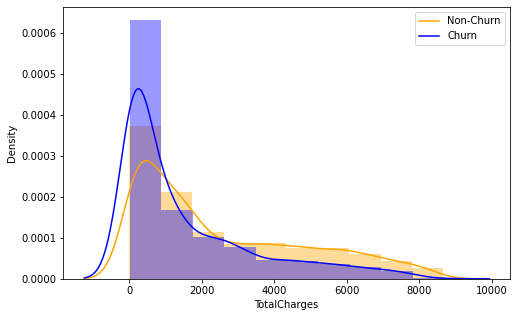

In [42]:
# numerical features grouped by churn
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 'No'][col],
                 bins=10,
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(df[df.Churn == 'Yes'][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

In [43]:
### Below showes that top 5 customerID number 4737,9680,5914,5168,0464 that staye more than 72 month in this operator and are using this telecome providers
around 6 years. So with this insight we can provide these customers special offer in calling and gives loyalty benifits to stay longer with the company

SyntaxError: invalid syntax (Temp/ipykernel_1872/1460570645.py, line 2)

In [ ]:
df['Tenure'].sort_values(ascending=False).head(5)

In [ ]:
#Tenure - This variable gives the inforamtion about how long the customers are with this telecome company in months.
# top five customers who are using this service from very long tim
df['Tenure'].sort_values(ascending=False).head(5)
df.sort_values('Tenure', ascending=False).head(5)['customerID']


In [44]:
df['TotalCharges'].mean()

2279.732177734375

In [45]:
df['MonthlyCharges'].mean()

64.76169246059922

In [46]:
df.head(2000)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8000-REIQB,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.95,69.949997,Yes
1996,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.649902,No
1997,0266-CLZKZ,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6717.899902,No
1998,7615-ESMYF,Female,0,Yes,No,2,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.099998,Yes


### Outliers: The box plots show there is no outliers in this data set.

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


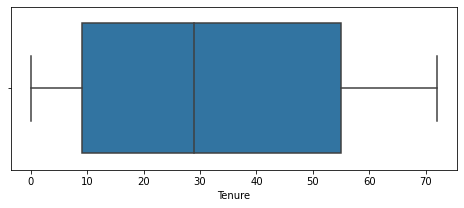

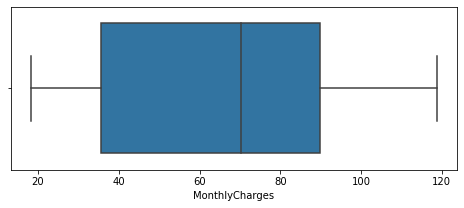

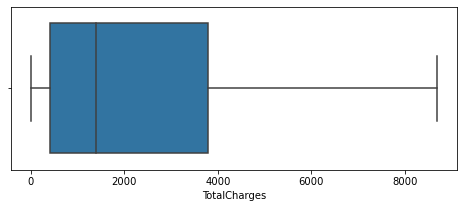

In [47]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

### Skewness: The density plots show they are not normal distributions.

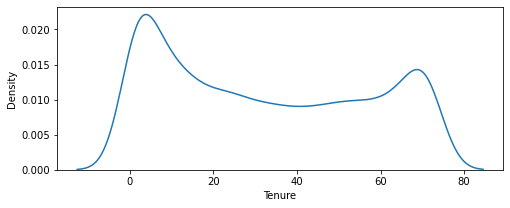

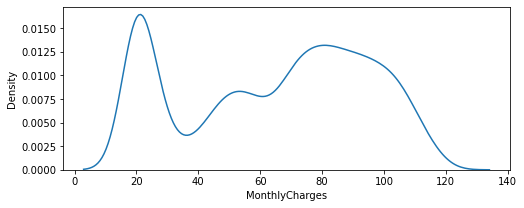

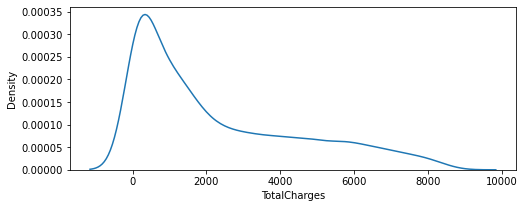

In [48]:
# distribution
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

### (6) Correlation: The correlation matrix plot shows that these numeric features have a positive relationship.

In [49]:
#matrix correlation
correlations = df.corr()
correlations

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


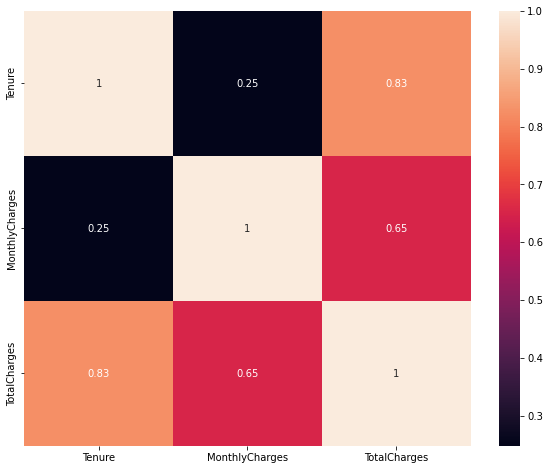

In [50]:
# correlation between numerical features
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

In [51]:
categorical

,customerID,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [52]:
categorical.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

### 3. Categorical Features
(1) Gender: The churn rate is similar between male and female, indicating Gender may not be a good predictor.

(2) Senior Citizen: Customer who is senior citizen is more likely to churn.

(2) Partner: Customer who does not have partner is more likely to churn.

(3) Dependents: Customer who does have dependents is more likely to churn.

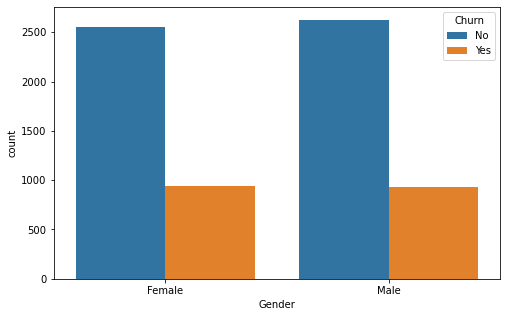

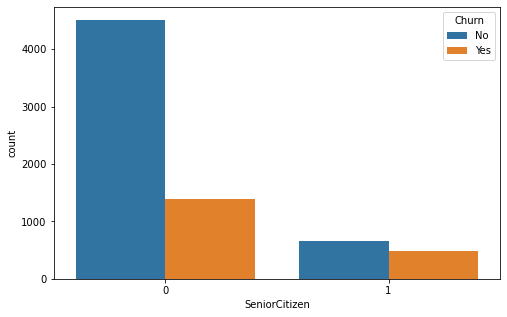

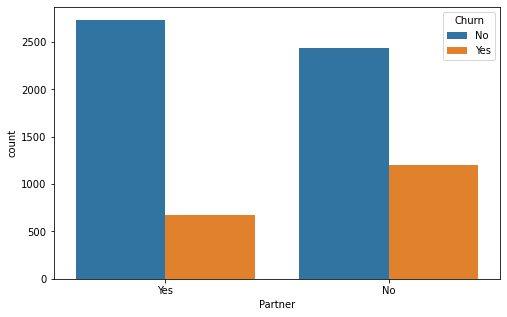

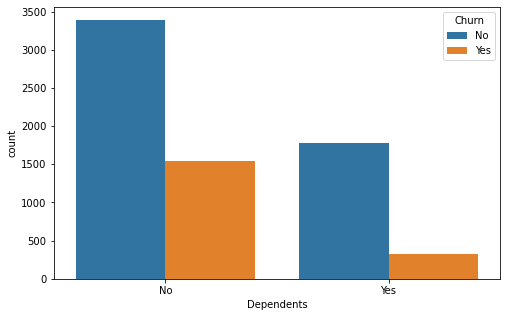

In [53]:
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

 (4) Phone Service: PhoneService is a redundant feature since we can get the same information from teh feature Multiple Lines. So, we could drop this column.

 (5) Multiple Lines: Customer who has multiple lines is slightly more likely to churn.

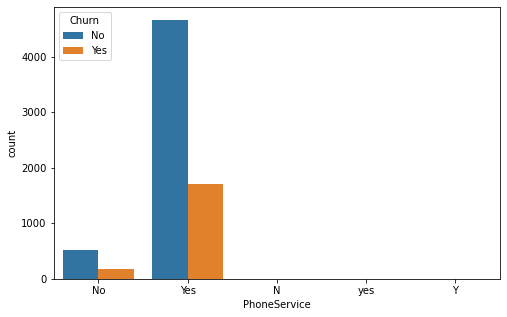

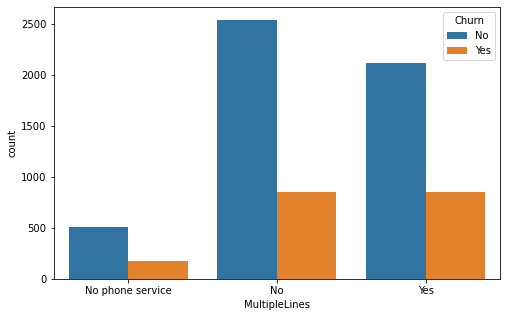

In [54]:
for col in ['PhoneService', 'MultipleLines']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(6) Internet Service: If customer's Internet service provider is Fiber optic, then he/she is more likely to churn.

(7) Online Security: Customer who does not have online security is more likely to churn.

(8) Online Backup: Customer who does not have online backup is more likely to churn.

(9) Device Protection: Customer who does not have device protection is more likely to churn.

(10) Tech Support: Customer who does not have tech support is more likely to churn.

(11) Streaming TV / Streaming Movies: Streaming TV and Streaming Movies have no big effect on churn rate; however, if customer does not have internet service, then he/she is less likely to churn.

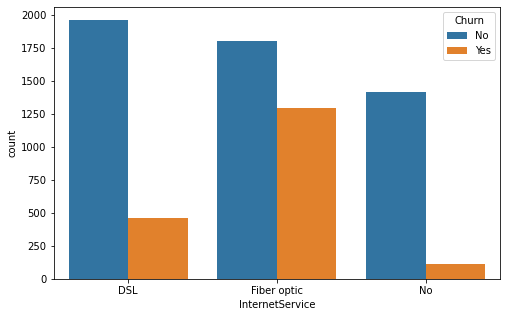

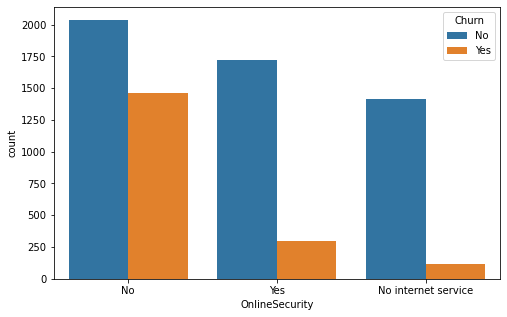

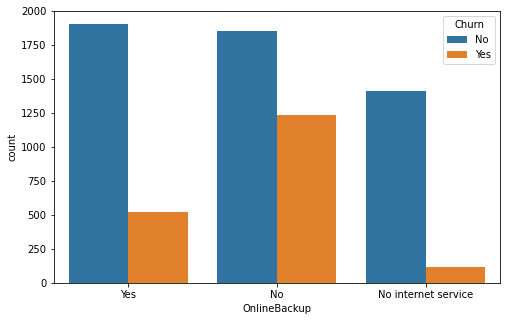

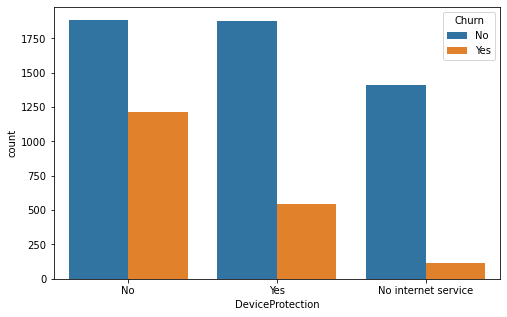

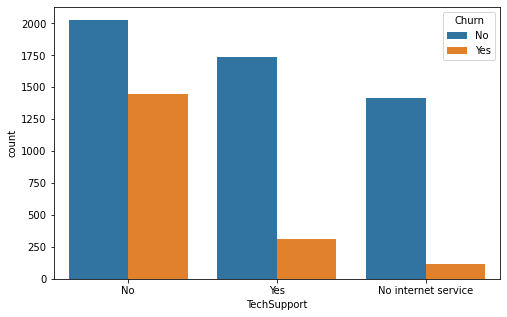

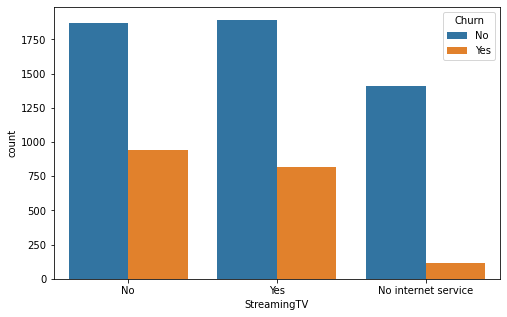

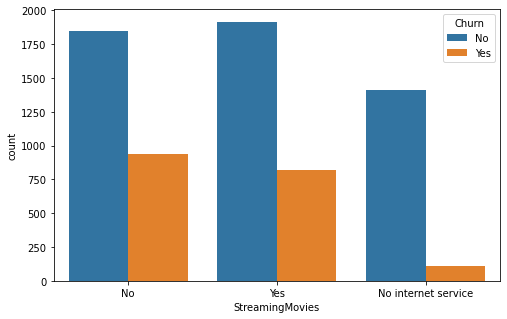

In [55]:
for col in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

###  V -Data Preprocessing

 ### Droping Unnecessary Columns
Remove the useless feature customerID.



In [56]:
# remove customerID and PhoneService
df2 = df.drop(['customerID'], axis = 1)
df2.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


### Categorical Data Encoding
Encode categorical variables, we use One-Hot Encoding for nominal variables and Label Encoding for ordinal variables.

One-Hot Encoding: Gender, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Churn

Label Encoding: Contract

In [57]:
# Dummy Variables(One-Hot Encoding)
Gender = pd.get_dummies(df2['Gender'], prefix='Genger', drop_first=True)
Partner = pd.get_dummies(df2['Partner'], prefix='Partner', drop_first=True)
Dependents = pd.get_dummies(df2['Dependents'], prefix='Dependents', drop_first=True)
MultipleLines = pd.get_dummies(df2['MultipleLines'], prefix='MultipleLines', drop_first=True)
InternetService = pd.get_dummies(df2['InternetService'], prefix='InternetService', drop_first=True)
OnlineSecurity = pd.get_dummies(df2['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
OnlineBackup = pd.get_dummies(df2['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
DeviceProtection = pd.get_dummies(df2['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
TechSupport = pd.get_dummies(df2['TechSupport'], prefix='TechSupport', drop_first=True)
StreamingTV = pd.get_dummies(df2['StreamingTV'], prefix='StreamingTV', drop_first=True)
StreamingMovies = pd.get_dummies(df2['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
PaperlessBilling = pd.get_dummies(df2['PaperlessBilling'], prefix='PaperlessBilling', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
Churn = pd.get_dummies(df2['Churn'], prefix='Churn', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PhoneService'], prefix='PhoneService', drop_first=True)


df3 = pd.concat([df2, Gender, Partner, Dependents, MultipleLines, InternetService, 
                 OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
                 StreamingMovies, PaperlessBilling, PaymentMethod, Churn], axis=1)

In [58]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['Contract']= label_encoder.fit_transform(df3['Contract']) 

In [59]:
# drop original columns
list = ['Gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
'PaymentMethod', 'Churn', 'Contract', 'PhoneService']
df3.drop(df3[list], axis=1, inplace=True)
df3.head()


,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Genger_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_No,PhoneService_Y,PhoneService_Yes,PhoneService_yes,Churn_Yes
0,0,1,29.85,29.850000,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,34,56.95,1889.500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2,53.85,108.150002,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,0,45,42.30,1840.750000,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


###  Splitting the Data into Training Set(70%) and Test Set(30%)
We split the data in 70:30 ratio so that 70% of the data will be used for training the model while 30% will be used for testing the model.

In [60]:
# train test split
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Churn_Yes',axis=1),df3['Churn_Yes'],test_size=0.3,random_state=101)

In [61]:
#check
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0]) 
    print(i.index)

RangeIndex(start=0, stop=4930, step=1)
RangeIndex(start=0, stop=2113, step=1)
RangeIndex(start=0, stop=4930, step=1)
RangeIndex(start=0, stop=2113, step=1)


In [62]:
## Standardization
standard_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

#from sklearn.preprocessing import StandardScaler
#scaler_s = StandardScaler() 
#data_standard_scaled = scaler_s.fit_transform(data)

In [63]:
# Normalization
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#scaler_m = MinMaxScaler() 
#data_normal_scaled = scaler_m.fit_transform(data)

## VI. Model Building & Evaluation
1. Logistic Regression

In [64]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
# Define function to run all models
def models_automation(models, X_train_standard, y_train,X_test_standard, y_test):
    for model in models:
        model.fit(X_train_standard, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

In [66]:
model_list = [LinearRegression(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_standard, y_train,X_test_standard, y_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


LinearRegression: Train -> -655294.3976459111, Test -> -680157.6944326266


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


MLPRegressor: Train -> -1996502.198236548, Test -> -2073835.7922688357
DecisionTreeRegressor: Train -> -0.7492128978062753, Test -> -0.7138647610833901
RandomForestRegressor: Train -> -0.10044027084106011, Test -> -0.08461437252875403


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### 1. Logistic Regression

In [67]:
# training 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs', class_weight='balanced')
lm.fit(X_train_standard, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [68]:
# predicting
y_pred = lm.predict(X_test_standard)

In [69]:
 #evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1546
           1       0.53      0.75      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



In [70]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1167  379]
 [ 142  425]]


In [71]:
#!pip install --upgrade scikit-learn

In [72]:
#Random Forest
# training and predicting
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [73]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.64      0.45      0.53       567

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



<AxesSubplot:>

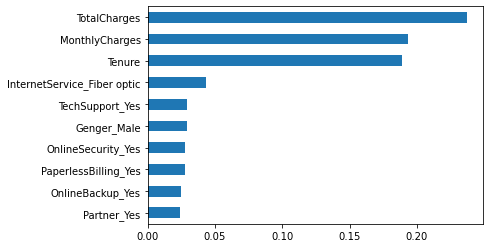

In [74]:
importances = forest.feature_importances_
weights = pd.Series(importances,index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## VII. Conclusion
 the best model is Logistic Regression 
